<a href="https://colab.research.google.com/github/ordospick/parking-lot/blob/master/CW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coursework 3 – Unsupervised and supervised learning on high dimensional data**

In [0]:
import pandas as pd 
import numpy as np
import sklearn
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [96]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Task 1: Unsupervised learning: text documents with an associated citation graph**

### **1.1 Clustering of the feature matrix (15 marks):**


**Preparing the data**


In [0]:
# import the statistics into Pandas DataFrames.
# as the default setting will read the first line as header, hence it is set to be None
feature = pd.read_csv("/content/drive/My Drive/feature_matrix.csv",header=None)
adjacency = pd.read_csv("/content/drive/My Drive/adjacency_matrix.csv",header=None)

In [6]:
#check
feature.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
adjacency.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,...,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000
mean,0.001207,0.001207,0.002012,0.002012,0.001207,0.001610,0.001207,0.000805,0.000805,0.000805,0.000805,0.002012,0.001610,0.001610,0.002012,0.002012,0.000402,0.002012,0.000805,0.002012,0.002817,0.001610,0.001610,0.000402,0.000805,0.002414,0.001610,0.003622,0.000402,0.001207,0.003219,0.001207,0.001610,0.002817,0.001207,0.001610,0.000805,0.002414,0.002414,0.000805,...,0.000402,0.001207,0.001207,0.000805,0.000402,0.001207,0.001207,0.000805,0.001207,0.000402,0.000805,0.000402,0.000402,0.000805,0.002414,0.002012,0.001207,0.005634,0.000402,0.001207,0.001207,0.001207,0.000805,0.001207,0.002012,0.000805,0.002012,0.000805,0.000402,0.000805,0.001610,0.000805,0.000805,0.000402,0.000805,0.000402,0.000402,0.000805,0.001610,0.001610
std,0.034731,0.034731,0.044820,0.044820,0.034731,0.040096,0.034731,0.028364,0.028364,0.028364,0.028364,0.044820,0.040096,0.040096,0.044820,0.044820,0.020060,0.044820,0.028364,0.044820,0.053010,0.040096,0.040096,0.020060,0.028364,0.049088,0.040096,0.060084,0.020060,0.034731,0.056659,0.034731,0.040096,0.053010,0.034731,0.040096,0.028364,0.049088,0.049088,0.028364,...,0.020060,0.034731,0.034731,0.028364,0.020060,0.034731,0.034731,0.028364,0.034731,0.020060,0.028364,0.020060,0.020060,0.028364,0.049088,0.044820,0.034731,0.074862,0.020060,0.034731,0.034731,0.034731,0.028364,0.034731,0.044820,0.028364,0.044820,0.028364,0.020060,0.028364,0.040096,0.028364,0.028364,0.020060,0.028364,0.020060,0.020060,0.028364,0.040096,0.040096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

**Find the optimised clustering**

I tried to find the optimised clusterings of the feature matrix F and ran
the k-means algorithm for all values of k in the interval [2, 30]. Then I computed the CH score for each k to evaluate the quality of clusterings.

**robustness of my results** 

*The k means algorithm starts by generate k centroids randomly, which may contributes to different clustering results. To reduce such randomness, the centers should be chosen the same each time, by setting the random state to a specific value, which is zero in my case.*

In [0]:
#initialize an array to store the CH score for different k
CH_score = []
#k in [2,30]
K = range(2,31)
#run the k-means algorithm to find clusterings of F for all ks
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(feature)
    labels = km.labels_
    CH_score.append(metrics.calinski_harabasz_score(feature, labels)) 

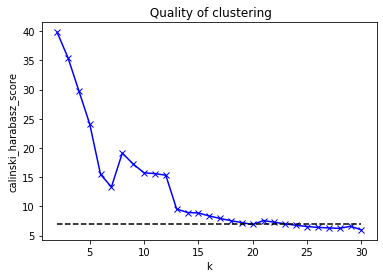

In [0]:
#plot the CH score for each K
plt.plot(K, CH_score, 'bx-')
plt.plot(range(2,31),[7]*29,'k--')
plt.xlabel('k')
plt.ylabel('calinski_harabasz_score')
plt.title(' Quality of clustering')
plt.show()

In [0]:
CH_score

[39.82545685410675,
 35.480992906370396,
 29.811723360332984,
 24.126245878867053,
 15.465126246727097,
 13.320311030979083,
 19.125820066253688,
 17.252254877194698,
 15.738868413746284,
 15.605724721176742,
 15.331499689960136,
 9.53575524332039,
 8.941579448036473,
 8.856951290347453,
 8.352343692404045,
 7.917559590677112,
 7.54167303495893,
 7.203056982570189,
 6.897477838816299,
 7.559401810113322,
 7.27086978774159,
 6.994833562132757,
 6.7434233084611845,
 6.539977241107766,
 6.394007489257677,
 6.2968748350663954,
 6.229968032059282,
 6.587648770094566,
 5.959377498529506]

The CH score first decreased rapidly when k increases and then fluctuated a bit, but
we can see that when k = 20, the CH score becomes smaller than 7 for the first time. Hence it is chosen to be the optimised clustering as required.

In [0]:
#Perform the optimised clustering found
km = KMeans(n_clusters=20,random_state=0)
km = km.fit(feature)
#extract the labels
labels = km.labels_

**Characteristics of this 'optimal' clustering**


In [27]:
print ("distribution of cluster sizes:",np.bincount(labels))

distribution of cluster sizes: [  3   1   1   9 360  11   1 624   1  13   3   3 335 753 361   1   1   1
   2   1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb6988fb00>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

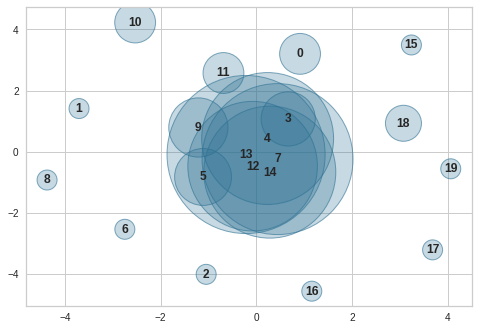

In [28]:
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(km)
visualizer.fit(feature)        # Fit the data to the visualizer


The output array gives the size of each cluster and the picture displayed above shows how the points are clustered into each group and distributed.
I can see that the clusters are highly overlapped, especially with those who are larger in size. Which means the optimal clustering model will not be able to give very reliable prediction.

In [48]:
from scipy.spatial.distance import cdist
#distance between the points and the closest centroid
distance = np.min(cdist(feature,km.cluster_centers_,'euclidean' ),axis = 1)
#average within group similarity for each point
within_similarity = sum(distance)/feature.shape[0]
CH = metrics.calinski_harabasz_score(feature, labels)
#CH score is defined as ratio between the 
#within-cluster dispersion and the between-cluster dispersion
across_similarity = CH*within_similarity*19/(2485-19)
print ("within group dissimilarity",within_similarity)
print ("across group dissimilarity",across_similarity)


within group dissimilarity 3.96372660373667
across group dissimilarity 0.2106466389941627


The distance to centroid within cluster is pretty high, so the group is not very compacted. The between-cluster dispersion is low, this means that the clusters are not well separated from each other and shows a sign of overlapping, which is consistent with the plot above. 

**Clustering analysis for quality**

**Calinski-Harabasz Index** 

The score CH score is defined as ratio between the within-cluster dispersion and the between-cluster dispersions. 

    CH score= [B(k)/(k−1)]/[W(k)/(n−k)]
*B(k) and W(k) are between- and within-cluster sums of squares for the k clusters.*

It becomes higher when clusters are dense and well separated, which indicate a better clustering.
 
 
**Silhouette score**

The Silhouette Coefficient is defined for each sample and is composed of two scores:

    SS = b-a/max(a,b)

 
*a:The mean distance between a sample and all other points in the same class.*

*b: The mean distance between a sample and all other points in the next nearest cluster.*

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.



**Davies-Bouldin index**

The Davies-Bouldin index is defined as the average similarity between each cluster
and its most similar one. Zero is the lowest possible score. A lower Davies-Bouldin index relates to a model with better separation between the clusters.




In [49]:

print("CH score",metrics.calinski_harabasz_score(feature, labels))
print("silhouette score",metrics.silhouette_score(feature, labels, metric='euclidean'))
print("davies_bouldin_score",metrics.davies_bouldin_score(feature, labels))


CH score 6.897477838816299
silhouette score -0.0327015809891909
davies_bouldin_score 2.8500784953512026


For k =20, the CH score is 6.897. It is not very high. (as I am explicitly asked to choose k with the first CH score smaller than 7) A low ratio between the within/between-cluster dispersions of my clusterings means that the groups are not separated in a very good way. 

The silhouette score I got is -0.033, which is very small and closed to zero, indicates overlapping clusters.

The davies bouldin score I got is 2.85. It means that my clusters are rather similar with each other.

In conclusion, the performance kmeans model with k = 20 is not very good.

### **1.2 Analysis of the citation graph (10 marks)**

**Citation Graph**

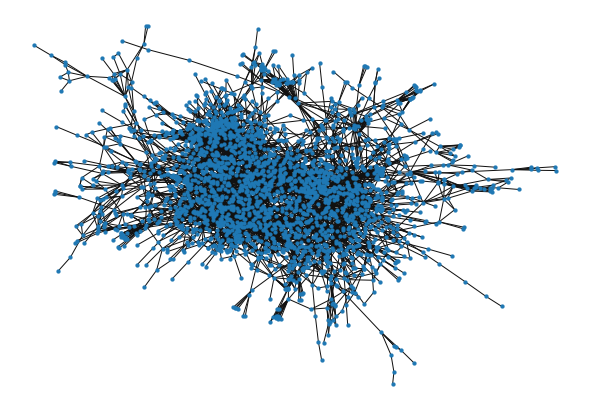

In [57]:
import networkx as nx
adj = adjacency.to_numpy()
#citation graph
G = nx.from_numpy_matrix(adj)
#position dictionary for nodes, will be passed to further training
f = nx.spring_layout(G)
#plot the graph with predefined position
nx.draw(G, f, node_size=15)


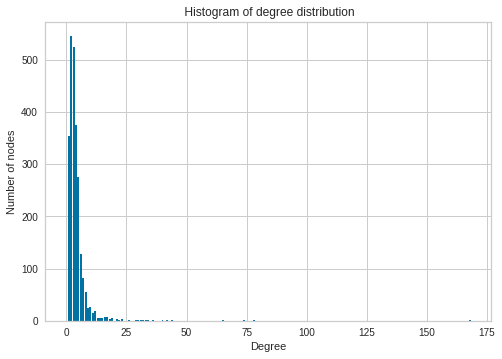

In [58]:
#recall the frequency for each degree
degree=nx.degree_histogram(G)
x=range(len(degree))
#plot degree distribution of the graph as a histogram
plt.bar(x,degree,width=0.8)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title(' Histogram of degree distribution')
plt.show()


**Compute the centrality measures for all the nodes**

In [0]:
#compute the centrality measures
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G, normalized=True)
pr = nx.pagerank(G)
#merge into a dataframe
centrality = pd.DataFrame({'degree centrality':pd.Series(deg_cen),
                           'betweenness centrality':pd.Series(bet_cen),'pagerank':pd.Series(pr)})


In [63]:
#The first 5 nodes with highest degree centrality
centrality.sort_values(by="degree centrality" , ascending=False).head(5)

,degree centrality,betweenness centrality,pagerank
1245,0.067633,0.276114,0.013302
271,0.031401,0.090707,0.005511
1563,0.029791,0.101355,0.006811
1846,0.026167,0.149763,0.005833
1672,0.017713,0.062338,0.003957


In [62]:
#The first 5 nodes with highest betweeness centrality
centrality.sort_values(by="betweenness centrality" , ascending=False).head(5)

,degree centrality,betweenness centrality,pagerank
1245,0.067633,0.276114,0.013302
1846,0.026167,0.149763,0.005833
1894,0.016103,0.106109,0.003471
1563,0.029791,0.101355,0.006811
271,0.031401,0.090707,0.005511


In [64]:
#The first 5 nodes with highest pagerank
centrality.sort_values(by="pagerank" , ascending=False).head(5)

,degree centrality,betweenness centrality,pagerank
1245,0.067633,0.276114,0.013302
1563,0.029791,0.101355,0.006811
1846,0.026167,0.149763,0.005833
271,0.031401,0.090707,0.005511
1672,0.017713,0.062338,0.003957


Node 1245, 1563,1846,271, 1672 and 1894 are the most central nodes in my neural network.
The rankings for degree centrality and pagerank are pretty similar as they share the same top 5 nodes. As 1245 have the highest centrality in all three rankings, then 1563 ranked the second in pagerank and the third in degree centrality.


**Correlation between centrality**

In [74]:
centrality.corr()

,degree centrality,betweenness centrality,pagerank
degree centrality,1.000000,0.876926,0.988432
betweenness centrality,0.876926,1.000000,0.884791
pagerank,0.988432,0.884791,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb66536668>,
      dtype=object)

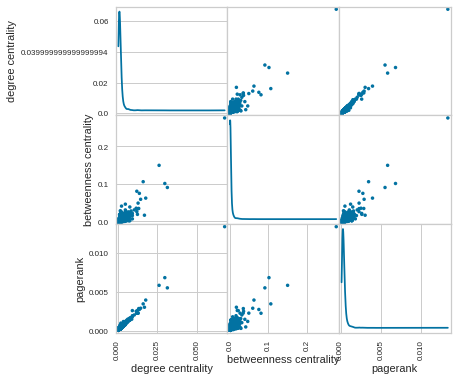

In [75]:
from pandas.plotting import scatter_matrix
#take the variables
variables = centrality[['degree centrality','betweenness centrality','pagerank']]
#scatter plots for each pair of variables
scatter_matrix(variables, alpha=1, figsize=(6,6), diagonal='kde')

**Degree centrality**: The number of links incident upon a node

**Betweenness centrality**:Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

**Pagerank**: PageRank is a variant of EigenCentrality, also assigning nodes a score based on their connections, and their connections’ connections.

There exist high correlations between my centrality metrics, especially between degree centrality and pagerank, with correlation almost equl to one and a line-like scatter plot. The reason behind is possibly that an eigen-based metric like pagerank tends to rate highly connected node as central. 

However the highly central nodes still ranked differently under different centrality metric. For instance, node 1894 has the third highest betweenness centrality among all the nodes, however it has a relatively lower degree and pagerank centrality when comparing with other central nodes. Possibly because the algorithm for betweenness centrality  scales a node’s importance in relation to the importance of its immediate neighbours, unlike other centrality measures does not.

### **1.3 Community detection on the citation graph (10 marks):**

**optimal number of communities k**

In [78]:
from networkx.algorithms.community import greedy_modularity_communities
#Use the Clauset-Newman-Moore greedy modularity maximisation algorithm
#to find the best k
c = greedy_modularity_communities(G)
print ("optimal k:", len(c))
print ("partition of the citation graph", c)

optimal k: 29
partition of the citation graph [frozenset({4, 7, 2058, 13, 2069, 2070, 23, 28, 39, 46, 51, 52, 57, 64, 65, 74, 2122, 89, 93, 96, 97, 2150, 113, 2167, 2177, 134, 148, 151, 152, 2201, 2207, 2208, 164, 165, 2214, 2219, 177, 2231, 2232, 2233, 2234, 195, 198, 199, 2253, 2255, 2261, 215, 217, 2273, 2274, 2275, 2276, 2277, 2278, 231, 2279, 2280, 2281, 2282, 2284, 236, 2285, 2286, 2291, 2292, 2297, 255, 256, 2307, 261, 266, 2319, 276, 2330, 283, 2334, 286, 290, 292, 2341, 2342, 297, 2349, 301, 2350, 2352, 305, 2355, 310, 317, 321, 322, 323, 2369, 328, 2377, 2379, 2380, 331, 2381, 2383, 2384, 335, 350, 2399, 2401, 2402, 363, 2412, 2413, 2424, 2426, 2428, 383, 2433, 385, 2440, 2441, 2442, 2450, 2451, 2453, 406, 2454, 2455, 420, 422, 2475, 2476, 434, 435, 443, 448, 454, 466, 476, 478, 485, 486, 487, 501, 506, 507, 510, 512, 513, 515, 528, 553, 556, 558, 559, 568, 570, 571, 574, 590, 596, 620, 621, 623, 624, 626, 639, 656, 665, 675, 677, 681, 685, 687, 690, 691, 693, 697, 701, 726, 

**Plot the obtained clusters on the NetworkX graph**



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

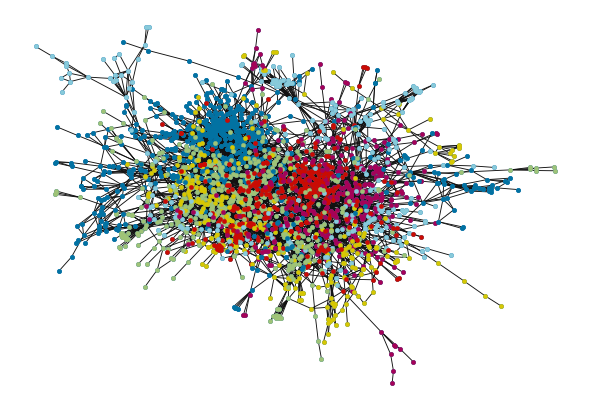

In [81]:
import seaborn as sns
#f here is the position dictionary used before
# Draw the graph, but don't color the nodes
nx.draw(G, f, edge_color='k',  
         font_weight='light', node_size= 20, width= 0.9)
palette = sns.color_palette(None, 29)
#For each community list, draw the nodes, giving it a specific color.
for i in range(29):
  nx.draw_networkx_nodes(G, f, node_size= 20, nodelist=set(c[i]), node_color=palette[i])

plt.show()

In [0]:
#community that each node belongs to
centrality['community'] = pd.Series(d)
#the most degree centralised nodes
dc30 = centrality.sort_values(by="degree centrality" , ascending=False).head(30)
#the most pagerank centralised nodes
pr30 = centrality.sort_values(by="pagerank" , ascending=False).head(30)

In [0]:
dc30['community'].value_counts(dropna=False)

1     6
4     4
2     4
0     4
5     3
3     3
8     2
11    1
10    1
9     1
7     1
Name: community, dtype: int64

In [0]:
pr30['community'].value_counts(dropna=False)

1     6
4     5
2     4
0     4
3     3
7     2
5     2
11    1
10    1
9     1
8     1
Name: community, dtype: int64

Among the top 30 most central nodes, 6 of them belongs to community 1, 4/5 of them belongs to community 4, 4 of them belongs to community 2. Hence for those nodes which are more central, they are more likely to belong to community 1,4 and 2. It can indicate that community 1,4 and 2 are more connected, as they will have more connections between the nodes.

**1.4 Compare feature and graph clusterings (10 marks):**

In [0]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
print ("AMI:", adjusted_mutual_info_score(centrality['community'],labels))
print ("ARI:", metrics.adjusted_rand_score(centrality['community'],labels)) 

AMI: 0.17165740014303546
ARI: 0.09446756389300728


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


The AMI and ARI between the two clusterings are both pretty low, hence they are not similar.

**Plot the kmeans clustering on citation graph**

In [88]:
#Before carrying on, I need to prepare the labels into something readable by network X
from collections import defaultdict

# Create a dict with empty list as default value.
labels_community = defaultdict(list)

# Initialise the list.

# Iterate list with enumerate.
for index, e in enumerate(labels):
    labels_community[e].append(index)

# Print out the occurrence of 'B'. 
labels_community

defaultdict(list,
            {0: [618, 1325, 1326],
             1: [1340],
             2: [622],
             3: [41, 162, 679, 1266, 1463, 1483, 2016, 2088, 2247],
             4: [0,
              9,
              12,
              21,
              22,
              25,
              38,
              63,
              89,
              96,
              113,
              140,
              145,
              151,
              156,
              160,
              161,
              172,
              173,
              178,
              182,
              188,
              196,
              199,
              200,
              201,
              203,
              206,
              208,
              220,
              222,
              229,
              237,
              249,
              253,
              277,
              280,
              286,
              291,
              293,
              296,
              305,
              307,
              309,
     

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

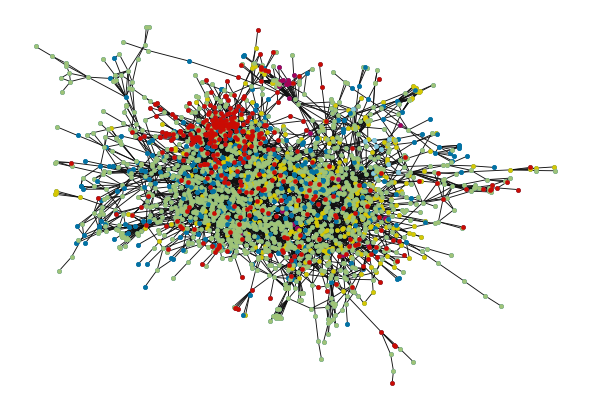

In [91]:

# Draw the graph, but don't color the nodes
nx.draw(G, f, edge_color='k',  
         font_weight='light', node_size= 20, width= 0.9)
palette2 = sns.color_palette(None, 20)
#For each community list, draw the nodes, giving it a specific color.
for i in range(20):
  nx.draw_networkx_nodes(G, f, node_size= 20, nodelist=set(labels_community[i]), node_color=palette[i])
plt.show()

As I have studied in task 1.1, the clustering computed by the kmeans method has a rather unsatisfying performance and tend to overlap with each other. Such conclusion is also supported by the citation graph above. I can see that, for the feature clustering, it is very hard to separate thoese clusters with different colors when looking at the diagram. Although there exists 20 groups, there are only nodes for a very limited number of colors on the diagram as the others are mixed up and overlapped with each other. In the other graph for Clauset-Newman-Moore greedy modularity maximisation algorithm, those nodes in the same color are more tightly packed, and there exists a clear border between those communities. Hence the latter is better.

## **Task 2: Classification of a set of images (45 marks)**

I have a collection of images of fashion items sold by Zalando. The dataset consists of 60,000 images in the training set and 10,000 additional images in the test set. Each sample is originally a grayscale image with 28x28 pixels, each pixel has a value of the grayscale between 0 and 255.

I explore the dataset in an unsupervised manner and evaluate how clearly separated the classes are. Second, I switched to supervised learning and use some of the ground truth labels to train two neural networks with different architectures for supervised classification.

### **2.1 Unsupervised clustering of the image dataset (20 marks):**

In [0]:
#import data
train_df = pd.read_csv("/content/drive/My Drive/fashion-mnist_train.csv")
test_df = pd.read_csv("/content/drive/My Drive/fashion-mnist_test.csv")

In [0]:
# train set
y_train_df = list(train_df.label)
X_train_df = train_df.loc[:, train_df.columns != 'label']

# test set
y_test_df = list(test_df.label)
X_test_df = test_df.loc[:, test_df.columns != 'label']

**Use the k-means algorithm to cluster the Fashion-MNIST dataset**

In [101]:
#initialize an array to store the CH score for different k
CH_score2 = []
#k in [2,30]
K = range(2,31)
#run the k-means algorithm to find clusterings of F for all ks
for k in K:
    km_train = KMeans(n_clusters=k,random_state = 0)
    km_train = km_train.fit(X_train_df)
    train_labels = km_train.labels_
    CH_score2.append(metrics.calinski_harabasz_score(X_train_df, train_labels)) 

KeyboardInterrupt: ignored

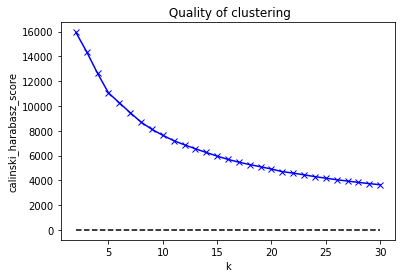

In [0]:
#plot the CH score for each K
plt.plot(K, CH_score2, 'bx-')
plt.plot(range(2,31),[7]*29,'k--')
plt.xlabel('k')
plt.ylabel('calinski_harabasz_score')
plt.title(' Quality of clustering')
plt.show()

In [0]:
print ("distribution of cluster sizes:",np.bincount(labels))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb6988fb00>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

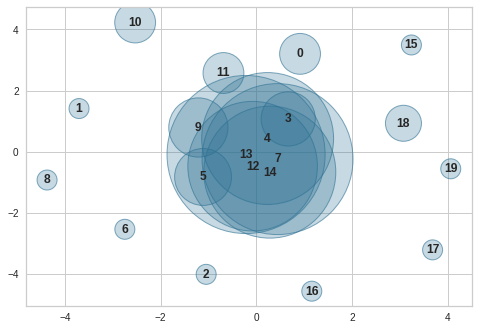

In [0]:
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(km)
visualizer.fit(feature)        # Fit the data to the visualizer


The output array gives the size of each cluster and the picture displayed above shows how the points are clustered into each group and distributed.
I can see that the clusters are highly overlapped, especially with those who are larger in size. Which means the optimal clustering model will not be able to give very reliable prediction.

In [0]:
from scipy.spatial.distance import cdist
#distance between the points and the closest centroid
distance = np.min(cdist(feature,km.cluster_centers_,'euclidean' ),axis = 1)
#average within group similarity for each point
within_similarity = sum(distance)/feature.shape[0]
CH = metrics.calinski_harabasz_score(feature, labels)
#CH score is defined as ratio between the 
#within-cluster dispersion and the between-cluster dispersion
across_similarity = CH*within_similarity*19/(2485-19)
print ("within group dissimilarity",within_similarity)
print ("across group dissimilarity",across_similarity)


within group dissimilarity 3.96372660373667
across group dissimilarity 0.2106466389941627


In [0]:
km_train = KMeans(n_clusters=10,random_state =123)
km_train = km_train.fit(X_train_df)

In [0]:
dhjs = km_train.cluster_centers_
label_pred = km_train.labels_

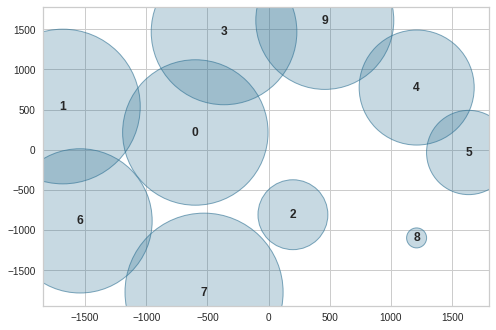

In [0]:
centers = np.array(dhjs)
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(n_clusters=10,random_state =  0))
fig1 =visualizer.fit(X_train_df)       # Fit the data to the visualizer


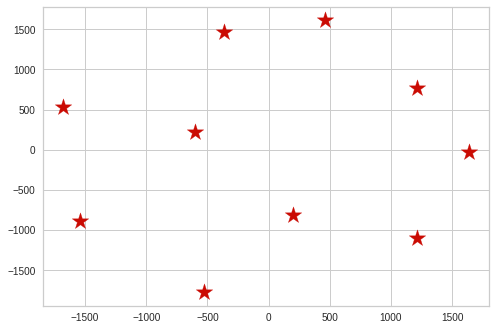

In [0]:
centroids = visualizer.embedded_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
c='r', label='centroid')

In [0]:
model = KMeans(n_clusters = 10,random_state=0)
model.fit(X_train_df)
ytrain_predicted = model.labels_
ytest_predicted = model.predict(X_test_df)

In [41]:
print(classification_report(y_test_df, ytest_predicted))

NameError: ignored

In [43]:
accuracy = np.mean(labels_pred == y_test_df)
print('测试集预测准确率：%f' % accuracy)

测试集预测准确率：0.117900


### **2.2 Supervised classification of the training set (25 marks)**

#### **2.2.1 MLP neural network supervised classification:**

In [0]:
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F
import torchvision.transforms as transforms

In [0]:
#set up of the network
input_size = 784    
hidden_size = 100
num_classes = 10
num_epochs = 30
batch_size = 128
learning_rate = 0.005

In [0]:
#pass the dataset to tensor
X_train = torch.from_numpy(X_train_df.values).float()
y_train = torch.from_numpy(np.array(y_train_df))
X_test = torch.from_numpy(X_test_df.values).float()
y_test = torch.from_numpy(np.array(y_test_df))
# loading data 
train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,shuffle = True)

test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle = False)

In [0]:
#set the MLP up as required
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, num_classes)

    
    def forward(self, x):
        out = F.relu(self.fc1(x))#relu as activation function
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = self.fc4(out)
        return F.log_softmax(out)

In [0]:
#define a function to train the neural network
def train_CNN(net, num_epochs):
    #SGD as optimisation method 
    optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate) 
    #negative log-likelihood loss
    criterion = nn.NLLLoss()
    total_step = len(train_loader)
    loss_values = []

    for epoch in range(num_epochs):

      net.train()#train mode
      train_loss = 0.0
      
      for i, (images, labels) in enumerate(train_loader):
        
        # reshape images to long vector
        images = images.reshape(-1,1,28,28)
        labels = labels
            
        # forward pass
        outputs = net(images)
        loss = criterion(outputs, labels)
            
      S  # backward and optimise
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        # update loss
        train_loss += loss.item()

        # print training statistics
        if (i+1) % 100 == 0:
          print('Epoch [{}/{}] \t Iteration [{}/{}] \t Training Loss: {:.6f}'.format(epoch, num_epochs, i+1, total_step, train_loss / 100))
          train_loss = 0.0
      
      loss_values.append(train_loss / 100)

    print('Finished Training')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch [0/30] 	 Iteration [100/469] 	 Training Loss: 1.476506
Epoch [0/30] 	 Iteration [200/469] 	 Training Loss: 0.662472
Epoch [0/30] 	 Iteration [300/469] 	 Training Loss: 0.592870
Epoch [0/30] 	 Iteration [400/469] 	 Training Loss: 0.549341
Epoch [1/30] 	 Iteration [100/469] 	 Training Loss: 0.488183
Epoch [1/30] 	 Iteration [200/469] 	 Training Loss: 0.474143
Epoch [1/30] 	 Iteration [300/469] 	 Training Loss: 0.470908
Epoch [1/30] 	 Iteration [400/469] 	 Training Loss: 0.453998
Epoch [2/30] 	 Iteration [100/469] 	 Training Loss: 0.423923
Epoch [2/30] 	 Iteration [200/469] 	 Training Loss: 0.418025
Epoch [2/30] 	 Iteration [300/469] 	 Training Loss: 0.419607
Epoch [2/30] 	 Iteration [400/469] 	 Training Loss: 0.410762
Epoch [3/30] 	 Iteration [100/469] 	 Training Loss: 0.389672
Epoch [3/30] 	 Iteration [200/469] 	 Training Loss: 0.386636
Epoch [3/30] 	 Iteration [300/469] 	 Training Loss: 0.390757
Epoch [3/30] 	 Iteration [400/469] 	 Training Loss: 0.383667
Epoch [4/30] 	 Iteration

In [0]:
#initialize MLP
mlp1 = NeuralNet(input_size = input_size, hidden_size = hidden_size,num_classes = num_classes)
#train the MLP on training set for 30 epoches
train_CNN(mlp1,30)

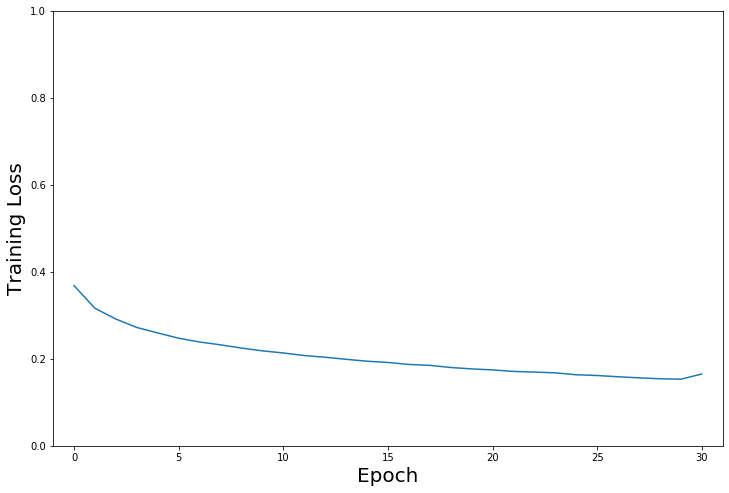

In [0]:
#plot the training loss
plt.figure(figsize=(12,8))
plt.ylim(0,1)
plt.xlim(-1, num_epochs+1)
plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss_values)

In [0]:
def test_CNN (network):
    network.eval()
    correct = 0
    total = 0
    for images, labels in test_loader:
      images = images.reshape(-1,1, 28,28)
      labels = labels
      outputs = network(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

In [0]:
net1.eval()

correct = 0
total = 0
for images, labels in test_loader:
  images = images.reshape(-1, 28*28)
  labels = labels
  outputs = net1(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 86.32 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


## **2.2.2**

In [0]:
class LeNetNLL(nn.Module):
    def __init__(self):
        super(LeNetNLL, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding = 0)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, stride = 2)
        self.fc1 = nn.Linear(256,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        self.logsoftmax = nn.LogSoftmax()
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1,256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.logsoftmax(self.fc3(x))
        return x



In [0]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, stride = 2)
        self.fc1 = nn.Linear(256,120) # 1600 = number channels * width * height
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        # flatten over channel, height and width = 1600
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=-1)
        return x

In [0]:
# loss
criterion = nn.NLLLoss()

# optimiser
optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)  

In [0]:
train = pd.read_csv("/content/drive/My Drive/fashion-mnist_train.csv")
test = pd.read_csv("/content/drive/My Drive/fashion-mnist_test.csv")
y_train = list(train.label)
X_train = train.loc[:, train.columns != 'label']

# test
y_test = list(test.label)
X_test = test.loc[:, test.columns != 'label']


In [0]:
X_train = torch.from_numpy(X_train.values).float()
y_train = torch.from_numpy(np.array(y_train))
X_test = torch.from_numpy(X_test.values).float()
y_test = torch.from_numpy(np.array(y_test))
# loading data 
train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,shuffle = True)

test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle = True)

In [0]:
net = LeNetNLL()
# loss
criterion = nn.NLLLoss()

# optimiser
optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate) 
total_step = len(train_loader)
loss_values = []

for epoch in range(num_epochs):

  ###################
  # train the model #
  ###################
  net.train()
  train_loss = 0.0
  
  for i, (images, labels) in enumerate(train_loader):
    
    # reshape images to long vector
    images = images.reshape(-1,1,28,28)
    labels = labels
        
    # forward pass
    outputs = net(images)
    loss = criterion(outputs, labels)
        
    # backward and optimise
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    # update loss
    train_loss += loss.item()

    # print training statistics
    if (i+1) % 100 == 0:
      print('Epoch [{}/{}] \t Iteration [{}/{}] \t Training Loss: {:.6f}'.format(epoch, num_epochs, i+1, total_step, train_loss / 100))
      train_loss = 0.0
  
  loss_values.append(train_loss / 100)

print('Finished Training')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [0/30] 	 Iteration [100/469] 	 Training Loss: 1.026638
Epoch [0/30] 	 Iteration [200/469] 	 Training Loss: 0.629256
Epoch [0/30] 	 Iteration [300/469] 	 Training Loss: 0.589403
Epoch [0/30] 	 Iteration [400/469] 	 Training Loss: 0.537519
Epoch [1/30] 	 Iteration [100/469] 	 Training Loss: 0.490022
Epoch [1/30] 	 Iteration [200/469] 	 Training Loss: 0.487420
Epoch [1/30] 	 Iteration [300/469] 	 Training Loss: 0.458244
Epoch [1/30] 	 Iteration [400/469] 	 Training Loss: 0.445826
Epoch [2/30] 	 Iteration [100/469] 	 Training Loss: 0.432323
Epoch [2/30] 	 Iteration [200/469] 	 Training Loss: 0.412576
Epoch [2/30] 	 Iteration [300/469] 	 Training Loss: 0.428114
Epoch [2/30] 	 Iteration [400/469] 	 Training Loss: 0.399881
Epoch [3/30] 	 Iteration [100/469] 	 Training Loss: 0.401792
Epoch [3/30] 	 Iteration [200/469] 	 Training Loss: 0.388148
Epoch [3/30] 	 Iteration [300/469] 	 Training Loss: 0.383150
Epoch [3/30] 	 Iteration [400/469] 	 Training Loss: 0.377757
Epoch [4/30] 	 Iteration

In [0]:
net.eval()

correct = 0
total = 0
for images, labels in test_loader:
  images = images.reshape(-1,1, 28,28)
  labels = labels
  outputs = net(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 89.13 %


In [0]:
pip install -U skorch

     |████████████████████████████████| 112kB 2.7MB/s 


In [0]:
from skorch import NeuralNetClassifier
net = NeuralNetClassifier(
    LeNetNLL, criterion=torch.nn.modules.loss.NLLLoss)
from sklearn.model_selection import RandomizedSearchCV


In [0]:
from skorch import NeuralNetClassifier
net10 = NeuralNetClassifier(
    Cnn,
    max_epochs =30,
    lr = 0.001,
    criterion=nn.NLLLoss,
    optimizer=torch.optim.Adam,
    iterator_train__shuffle=True)
params = {S
    'lr': [0.01, 0.005,0.05],
    'max_epochs': [ 20,30]
}
from sklearn.model_selection import GridSearchCV
net10.fit(X_train_df, y_train_df)

  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        0.8296       0.7858        0.5609  11.4226
      2        0.5142       0.8244        0.4701  11.5553
      3        0.4486       0.8393        0.4364  11.5322
      4        0.4064       0.8594        0.3833  11.6459
      5        0.3805       0.8628        0.3860  11.5974
      6        0.3579       0.8722        0.3496  11.6582
      7        0.3413       0.8729        0.3466  11.4816
      8        0.3295       0.8777        0.3305  11.5977
      9        0.3130       0.8852        0.3240  11.5758
     10        0.3037       0.8876        0.3059  11.5805
     11        0.2907       0.8886        0.3078  11.6098
     12        0.2834       0.8785        0.3224  11.6660
     13        0.2735       0.8939        0.2997  11.7218
     14        0.2620       0.8913        0.2982  11.7519
     15        0.2571       0.8880        0.2980  11.8124
     16       

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Cnn(
    (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=256, out_features=120, bias=True)
    (fc2): Linear(in_features=120, out_features=84, bias=True)
    (fc3): Linear(in_features=84, out_features=10, bias=True)
  ),
)

In [0]:
y_pred = net10.predict(X_test_df)

In [0]:
train_loss = gs.best_estimator_.history[:,'train_loss']
valid_loss = gs.best_estimator_.history[:,'valid_loss']

AttributeError: ignored

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df, y_pred)

0.9038